In [19]:
#import library
from sklearn import model_selection as ms
from sklearn import datasets as dt
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn import metrics as mt
import numpy as np

In [5]:
#load dataset
X, y = dt.make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1 ,random_state=42)


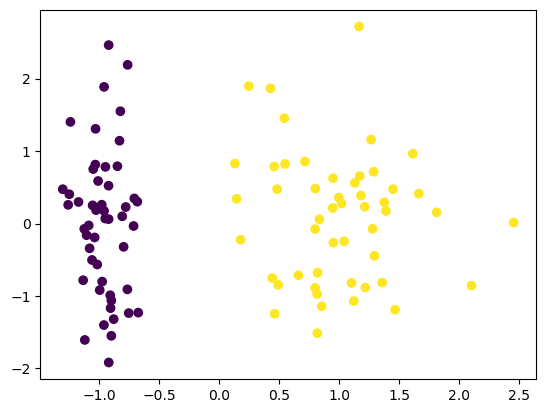

In [7]:
plt.scatter(X[:, 0], X[:,1], c=y)

In [8]:
x_train, x_test, y_train, y_test = ms.train_test_split(X, y, train_size=0.3, random_state=42)

In [ ]:
#define
model = lm.LogisticRegression()

#training
model.fit(x_train, y_train)


pred_test = model.predict(x_test)

In [12]:
pred_test

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1])

In [17]:
#performance

f1 = mt.f1_score(y_test, pred_test)
f1

1.0

In [36]:
# Decision Boundary
#yhat = theta0 + theta1*X1 + theta2*X2

theta_0 = model.intercept_[0]
theta_1, theta_2 = model.coef_.T

c = theta_0/theta_2
m = theta_1/theta_2

xmin, xmax = np.min(x_train), np.max(x_train)
ymin, ymax = -1.6, 3.0

xd = np.array([xmin, xmax])
yd = m*xd + c

In [37]:
np.min(x_train)

-1.6074832345612275

(-1.6074832345612275, 2.720169166589619)

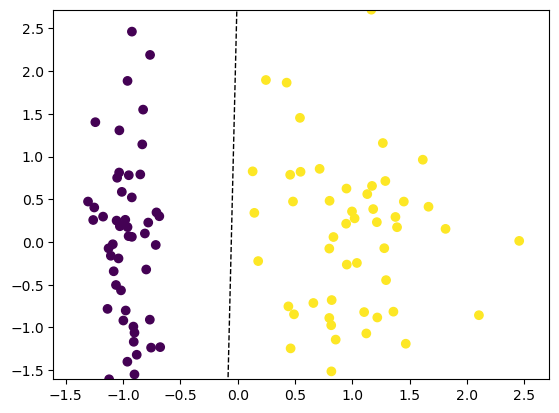

In [40]:
plt.plot(xd, yd, 'k', lw=1, ls='--')
#plt.fill_between(xd, yd, ymin, color='blue', alpha=0.2)
#plt.fill_between(xd, yd, ymax, color='yellow', alpha=0.2)
plt.scatter(X[:, 0], X[:,1], c=y)

plt.xlim(xmin, xmax)
plt.ylim(xmin, xmax)

In [69]:
# Decision Boundary Porbability

xx, yy = np.mgrid[-2:2.5:0.01, -2:3.0:0.01]

grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:,1].reshape(xx.shape)


In [70]:
probs

array([[0.00840368, 0.00840724, 0.0084108 , ..., 0.01036995, 0.01037434,
        0.01037872],
       [0.00860691, 0.00861055, 0.0086142 , ..., 0.01062022, 0.01062471,
        0.0106292 ],
       [0.00881501, 0.00881874, 0.00882247, ..., 0.01087647, 0.01088106,
        0.01088566],
       ...,
       [0.99753302, 0.99753407, 0.99753512, ..., 0.99800381, 0.99800466,
        0.99800551],
       [0.99759162, 0.99759265, 0.99759367, ..., 0.99805125, 0.99805208,
        0.99805291],
       [0.99764883, 0.99764984, 0.99765084, ..., 0.99809757, 0.99809838,
        0.99809919]])

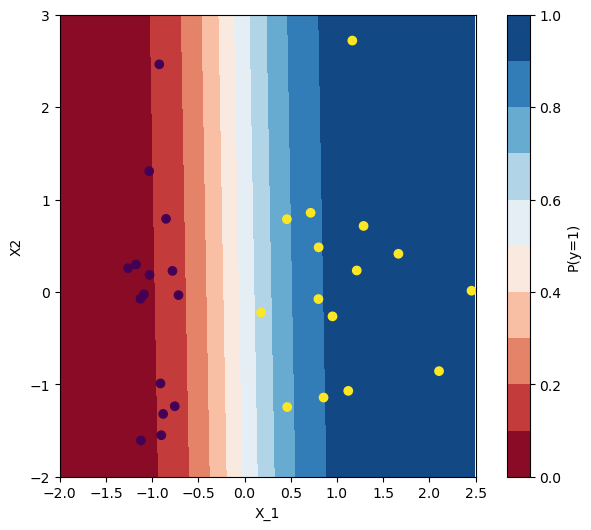

In [72]:
f, ax = plt.subplots(figsize=(8,6))
contour = ax.contourf(xx,yy,probs,10,cmap='RdBu', vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("P(y=1)")

plt.scatter(x_train[:, 0], x_train[:,1], c=y_train)
ax.set(aspect='equal', xlim=(-2, 2.5), ylim=(-2,3), xlabel='X_1', ylabel='X2');